# PHYS 250 Computational Midterm Exam

**Notes:**
1. You have 2 hours to do the exam.  Your solution must be uploaded to Canvas (exactly as is done for the prelabs and labs) as a notebook file with its name unchanged.  **Late exams will not be accepted.**  A little bit of extra time has been allotted on Canvas for you to turn it in before it will claim the exam is late.  This is meant to insure that you have a full 2 hours to work on the exam, and then a little bit of time to turn in it.  It is not extra time to work on the exam!
2. You must work on the exam yourself.  It must all be your work.  You are free to use resources from the course (prelabs, labs, and examples) as you wish **but not other people** (this even excludes people not in the course).  I am trying to be flexible in terms of when people can work on this portion of the exam.  This means different students will be working on the exam at different times.  **Do not discuss the exam with other students until everyone has completed it.**
3. The exam is meant to be completed in the allotted time.  I may have misjudged the amount of time the questions will take.  Keep in mind that everyone is in the same situation as yourself.  If the exam is too long everyone will suffer similarly and I will take that into account when assigning grades.  It is best to look at all the problems and do as much work as you can starting with the problem you are most comfortable with.
4. The points for each problem are given below.  You can use this information to decide how to apportion your time working on the problems.
5. When I ask for descriptions include all the information you think is relevant to convince me that (a) you know how to solve the problem, and (b) can be used to reproduce the results if someone else in the class were given the description.  The more clear these descriptions are the better chance I have in understanding what you have done and assigning partial credit. When making nice plots you must follow all the good practices discussed and used in the labs.
6. **Restart the kernel and rerun the notebook** before turning it in.  Part of the grading process is rerunning the notebook.  The state you left the notebook in is not the final state.  It is the rerun notebook that will be graded, not the static version as turned in.  See Lab00 to remind yourself of what is expected.
7. **Read the questions carefully.** There is important information given in various places in various parts of the problem.  Do not skip reading sections, even if they are very small.

## Initialization

Collect all your initialization here.  Make sure all figures are inlined by using `%matplotlib inline`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.integrate as integ
import scipy.optimize as opt
# Globally fix plot styling
import matplotlib as mpl
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)
%matplotlib inline
# We will use random numbers in this example, so like we saw earlier ...
rng = np.random.default_rng()

## 1. Voigt Profile (20 points)

The Voigt profile is a distribution that is often used to describe the shape of spectral lines. Physically it is used to describe the combined effects of Doppler and pressure broadening, such as occurs in the atmosphere. Here we will numerically explore some properties of this distribution.

The Voigt profile can be calculated as the convolution of a Gaussian and a Lorentzian where the Gaussian has zero mean and standard deviation given by $\sigma$, while the Lorentzian is centered and described by a parameter $\gamma$. Symbollically this is written as
$$ V(x; \sigma, \gamma) = \int_{-\infty}^{\infty} G(y; \sigma) L(x-y; \gamma) \,\mathrm{d}y, $$
where the Gaussian is given by
$$ G(x; \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{x^2}{2\sigma^2} \right) $$
and the Lorentzian is given by
$$ L(x; \gamma) = \frac{\gamma}{\pi (x^2 + \gamma^2)}. $$

Although this integral can be written in terms of a special function (the Faddeeva function, one I have never encountered anywhere else), we will numerically perform the integral.

To set this up, define the function below that contains the **integrand**. We will end up passing this function to `quad` to do the integral for us. Note that `y` is the integration variable. (You can define other functions to make defining the integrand simpler if you prefer.) The signature for the integrand is given below. As always, you must document this function.

In [2]:
# YOUR CODE HERE

def gaussian(x,sigma):
    """ This returns the value of a Gaussian at a xvalue for a gaussian with a standard deviation sigma"""
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp((-x**2)/(2*sigma**2))
def lorentzian(x,gamma):
    """This returns the values of a lorentzian, centered on gamma at x"""
    return gamma/(np.pi*(x**2+gamma**2))

def voigt_integrand(y, x, sigma, gamma):
    """ This returns the value of the integrand of the Voitto profile. Sigma is the standard deviation of the gaussian and gamma is then center of the lorentzian"""
    return gaussian(y,sigma)*lorentzian(x-y,gamma)


Use the `voigt_integrand` function to calculate the Voigt profile for $x\in[-10, 10]$ at about 200 points when $\sigma=0.3$ and $\gamma=1.1$ by numerically performing the integral. Produce a quick plot of the profile so we can see what it looks like.

No handles with labels found to put in legend.


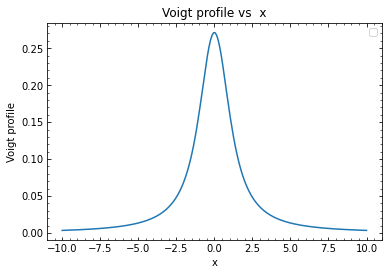

In [3]:
sigma=0.3
gamma=1.1
spacing=np.linspace(-10,10,200)
res=np.zeros_like(spacing)
err=np.zeros_like(spacing)
for j in range( len(spacing)):
    (res[j], err[j])=integ.quad(voigt_integrand,-np.inf,np.inf,args=(spacing[j],sigma,gamma))

fig = plt.figure()
plt.plot(spacing,res)
plt.title("Voigt profile vs  x")
plt.xlabel("x")
plt.ylabel("Voigt profile")
plt.legend()


One important property of a spectral line is its "width". Conventionally the width is specified as the Full Width at Half Maximum (FWHM). For the Voigt profile the maximum occurs when $x=0$. (You do not have to show this.) This means $V_{\mathrm{max}}=V(0; \sigma, \gamma)$. From this, the FWHM is defined as $|\tilde{x}_2 - \tilde{x}_1|$, where $\tilde{x}_i$ are the two solutions to
$$ V(\tilde{x}; \sigma, \gamma) = \frac{V_{\mathrm{max}}}{2} .$$

Accurately determine the FWHM for the Voigt profile you calculated above. "Accurately" means we cannot just look through the values we tabulated above, we need to do something more. There are many ways to do this you, any one of them will be acceptable.

Print the value of the FWHM you find. Also, produce a nice plot of the Voigt profile with a horizontal line drawn at half the maximum and with two vertical lines for the $\tilde{x}$ values you used to calculate the FWHM.

In [4]:
aspline = interp.InterpolatedUnivariateSpline(spacing, res)
timesofintrest=spacing[np.where((0.13<res) & (res<0.14))]

halfvalue=aspline(0)/2
aspline2 = interp.InterpolatedUnivariateSpline(spacing, res-halfvalue) ## making the assumption it is symmetric across x=0 for time
x_1=opt.brentq(aspline2,timesofintrest[0],0)
x_2=opt.brentq(aspline2,timesofintrest[1],x_1+.5)
f_v=np.abs(x_2-x_1)
print(f'The FWHM is {f_v} ')

The FWHM is 2.4205539477110847 


The FWHM of the Voigt profile cannot be calculated analytically so approximations are often used. These approximations are typically written in terms of
$$ f_G = 2\sigma \sqrt{2\ln(2)} \quad\mbox{and}\quad f_L = 2\gamma, $$
which are the known FWHM for the Gaussian and Lorentzian, respectively.

Two approximations often quoted are
$$ f_V^{(1)} \approx \frac{f_L}{2} + \sqrt{\frac{f_L^2}{4} + f_G^2} $$
and
$$ f_V^{(2)} \approx 0.5346 f_L + \sqrt{0.2166 f_L^2 + f_G^2}. $$
It is claimed that $f_V^{(1)}$ is accurate to about 1.2% and that $f_V^{(2)}$ is accurate to about 0.02%.

Here we will test these claims. Use your calculated value of the FWHM as the "true" value and calculate the fractional error in these two approximations. Print the two approximate values of the FWHM and their fractional errors. This should verify the claimed accuracy of the approximations. (This is a check for you! Your FWHM must be consistent with the approximations within the claimed accuracy.)

In [5]:
f_g= 2*sigma*np.sqrt(2*np.log(2))
f_l= 2*gamma
f_v1=f_l/2 +np.sqrt(((f_l**2)/4)+f_g**2)
f_v2 = 0.5346*f_l+np.sqrt(0.2166*f_l**2+f_g**2)
print(f'The error for the first approximation,{f_v1}, is {(f_v-f_v1)/f_v}. The error for the second approximation,{f_v2}, is {(f_v-f_v2)/f_v}')

The error for the first approximation,2.4073124989852888, is 0.005470420825909392. The error for the second approximation,2.4200693438252063, is 0.00020020371218604417


## 2. Rocket Motion [30 points]

The vertical motion of a rocket that burns fuel for some period of time is a standard application of Newton's second law. Here we will consider a rocket that starts from rest on the ground, is launched vertically, then falls back to the Earth. The equation of motion for the rocket can be written as
$$ [m_r + m_p(t)] \frac{\mathrm{d}^2 h}{\mathrm{d} t^2} = -[m_r + m_p(t)] g + \dot{m}_p(t) v_e - \frac{1}{2} A \rho C_D v(t) |v(t)|. $$
In this expression
* $h(t)$ is the altitude of the rocket,
* $v(t)$ is the vertical velocity of the rocket,
* $m_r$ is the mass of the body of the rocket,
* $m_p(t)$ is the mass of the rocket propellant,
* $\dot{m}_p(t)$ is the rate at which the propellant is being burned,
* $v_e$ is the exhaust speed of the propellant,
* $\rho$ is the average air density (taken to be constant for the entire flight),
* $A$ is the cross sectional area of the rocket,
* $C_D$ is the drag coefficient,
* $g$ is the usual acceleration due to gravity near the surface of the Earth.

The rate at which the propellant is burned, $\dot{m}_p(t)$, is a known function which will be given below and which will allow us to determine $m_p(t)$.

Convert the equation of motion for the rocket into a system of equations that can be solved numerically. Typeset the equations using LaTeX and state the initial conditions to use to uniquely solve for the motion of the rocket.

$$\frac{dh}{dt}=v $$
$$\frac{dv}{dt}=\frac{-[m_r + m_p(t)] g + \dot{m}_p(t) v_e - \frac{1}{2} A \rho C_D v(t) |v(t)|}{[m_r + m_p(t)]} $$

To test the code we write we will consider a simple propellant burn rate: a constant burn rate for some time $t_{\mathrm{burn}}$ which can be written as
$$ \dot{m}_p(t) = \left\{ \begin{array}{cc}
 \dot{m}_{p,0} & t < t_{\mathrm{burn}} \\
 0 & \mathrm{otherwise} \end{array} \right. . $$
From this we can determine the mass of the remaining propellant by integrating the burn rate. Let $m_{p,0}$ be the initial mass of the propellant, then
$$ m_p(t) = m_{p,0} - \int_{0}^{t} \dot{m}_p(t')\, \mathrm{d} t' =
  \left\{ \begin{array}{cc}
 m_{p,0} - \dot{m}_{p,0} t & t < t_{\mathrm{burn}} \\
 0 & \mathrm{otherwise} \end{array} \right. . $$
 
To avoid problems, here is a function that returns the mass of the propellant, $m_p(t)$, and the burn rate $\dot{m}_p(t)$. This is written in a form that is vectorized (ie., can be called with an array of times). It is not the most efficient implemenation, but is sufficient for our uses.

In [6]:
def mass_propellant(t, mp0, mpdot0, tburn):
    """
    The mass of the propellant and its burn rate at time t.
    Inputs:
      t : scalar or array : Times at which to determine the mass and burn rate.
      mp0 : Initial mass of propellant.
      mpdot0 : Initial (constant) burn rate.
      tburn : Total time that the propellant burns.
    Outputs:
      A tuple of two values are returned for each time:
      mp : mass of the propellant.
      mpdot : burn rate of the propellant.
    """
    # The Heaviside function is a step function.
    # Of course it exists in NumPy!
    step = np.heaviside(tburn-t, 0)
    m = mp0 - mpdot0 * t
    return (step * m, step * mpdot0)

To confirm the function works and makes sense, make a quick plot of the mass of the propellant and the burn rate as a function of time. Use $m_{p,0} = 100\,\mathrm{kg}$, $\dot{m}_{p,0} = 20\,\mathrm{kg/s}$, and $t_{\mathrm{burn}}=5\,\mathrm{s}$ and plot up to $6$ seconds. You can put both curves on the same plot. The shape of the curves should make sense.

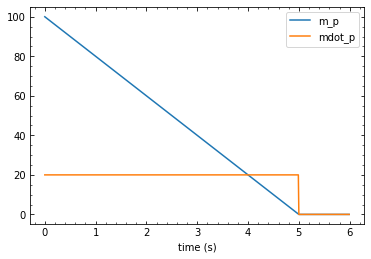

In [7]:
mp0=100 ##kg, assuming no unit conversion needed
mdotp0= 20 ## kg/s
tBurn=5 ##s
t2=np.arange(0,6,0.01)
output =mass_propellant(t2,mp0,mdotp0,tBurn)
fig = plt.figure()
plt.plot(t2,output[0], label='m_p')
plt.plot(t2,output[1], label='mdot_p')
plt.xlabel("time (s)")
plt.legend()

Define a function we can pass to `solve_ivp` to solve the system of equations you wrote above. As always, this function must be documented. Use $g=9.81\,\mathrm{m/s^2}$.

In [8]:
def rocket(t, y, mr, mp0, mpdot0, tburn, ve, rho, A, CD):
    """
`   step of rocket trajectory
    :param t: time of step to calculate
    :param y: init value. structure as y[0] =height at t in meters, y[1]= v meter per second,y[2]=mp kg, y[3]=mpdot kg/s
    :param mr: rocket mass in kg
    :param mp0: inital mass of perpelent
    :param mpdot0: init rate of fuel burning kg/s
    :param tburn: time of burn
    :param ve: exhast speed
    :param rho: density of air
    :param A:  cross section area of rocket
    :param CD: Drag coefficient
    :return: dydt( change in values of y) same order
    """
    g=9.81 #m/s^2
    dydt=np.zeros_like(y)
    dydt[0]=y[1]

    topeq=-(mr+y[2])*g+y[3]*ve-.5*A*rho*CD* y[1]*np.linalg.norm(y[1])
    bottomeq=(mr+y[2])
    dydt[1]= topeq/bottomeq
    (newmp,newmpdot)=mass_propellant(t,mp0,mpdot0,tburn)
    dydt[2]=y[2]-newmp
    dydt[3]=y[3]-newmpdot
    return dydt



It would now be good to do a number of test of the function we just wrote. One good test would be to start with no air resistance and cases with and without burning propellant. Due to limited time we will instead jump straight to solving for one rocket flight.

Here we will use the propellant parameters given above (for the plot you produced). We will also choose
* $m_r = 50\,\mathrm{kg}$,
* $v_e = 325\,\mathrm{m/s}$,
* $\rho=1.091\,\mathrm{kg/m^3}$,
* the rocket as cylinder, so the cross sectional area is $A=\pi r^2$ with $r=0.5\,\mathrm{m}$,
* $C_D=0.15$.

Solve the system of equations for a long enough time to see the rocket return to the ground. Produce a quick plot of the altitude and velocity of the rocket as a function of time. (*Hint:* The total time will be less that $100\,\mathrm{s}$. Use a time less than this.)

1583


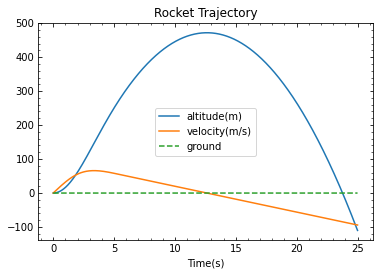

In [9]:
mr = 50 #kg
ve= 325 #m/s
rho= 1.091 #kg/m^3
A= np.pi * 0.5**2 #m^2
CD=0.15
#t, y, mr, mp0, mpdot0, tburn, ve, rho, A, CD
y0=[0,0,mp0,mdotp0]
sol = integ.solve_ivp(lambda time, h: rocket(time, h, mr,mp0,mdotp0,tBurn,ve,rho,A,CD), (0, 25), y0,
                       atol=1e-12, rtol=1e-12)
fig = plt.figure()
plt.plot(sol.t,sol.y[0], label='altitude(m)')
plt.plot(sol.t,sol.y[1], label='velocity(m/s)')
plt.plot(sol.t,np.zeros_like(sol.t) ,'--',label='ground')
plt.title("Rocket Trajectory")
plt.xlabel("Time(s)")
plt.legend()
print(len(sol.y[1]))

Since we have not run test cases, one check we can do is look at the time when the velocity of the rocket is a maximum. *Accurately* determine and print the maximum speed of the rocket, the time at which this occurs, and the height of the rocket at this time. (Remember that all these quantities have units!)

In [10]:
vspline=interp.InterpolatedUnivariateSpline(sol.t,sol.y[1])
asplineheight=interp.InterpolatedUnivariateSpline(sol.t,sol.y[0])
maxspeedtime=opt.brentq(vspline.derivative(1),0,5)
print(f'The max speed of the rocket is {vspline(maxspeedtime)} m/s at time {maxspeedtime} s and is at a height of {asplineheight(maxspeedtime)} m')

The max speed of the rocket is 65.95119050092558 m/s at time 3.351889959490301 s and is at a height of 146.23446602985805 m


The time at which the maximum velocity occurs is "obvious". Here "obvious" means that we knew what the time would be even before doing the calculation and/or now that we see the answer, it makes sense.

Briefly explain why the time of the maximum velocity make sense.

The max velocity is obviously the time right when the rocket stops burning at tBurn because the is when it will stop having a positive acceleration and will start to decelerated due to gravity.

Determine and print the maximum altitude the rocket achieves and the time at which this occurs. Also determine and print the time at which the rocket hits the ground and the speed it has when it hits.

In [11]:
asplineheight=interp.InterpolatedUnivariateSpline(sol.t,sol.y[0])
maxheighttime=opt.brentq(asplineheight.derivative(1),10,15)
print(f'The max height of the rocket is {asplineheight(maxheighttime)}m at time equals {maxheighttime}s')

The max height of the rocket is 471.74786551244966m at time equals 12.631740375516113s


## Turn in the Exam

Turn in the exam following the procedure described at the top of the notebook.